In [1]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=016b3c584c7f00c0be4a88c7be5e1c046c98b00821d6510e7c2dbc75ba251cc3
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.trend import EMAIndicator, SMAIndicator

In [4]:
df = pd.read_csv(r"historical_data.csv")

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')


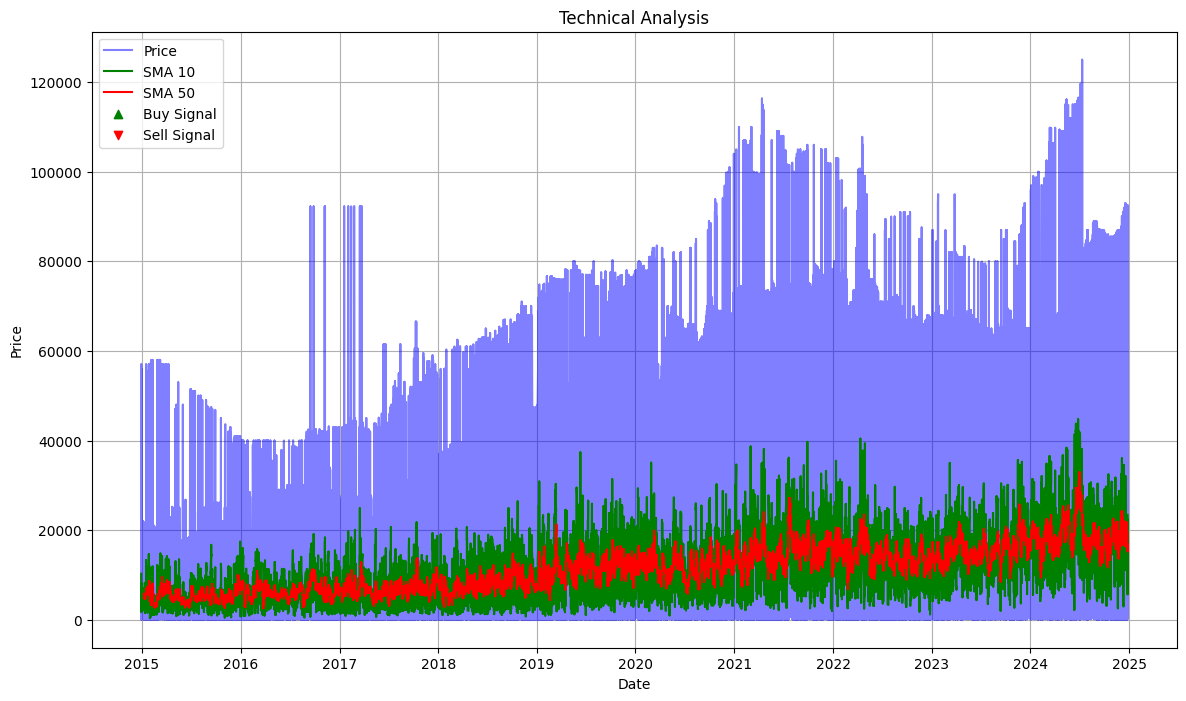

In [5]:
def calculate_technical_indicators(df):
    # Simple Moving Average (SMA)
    df['SMA_10'] = SMAIndicator(close=df['LastTransactionPrice'], window=10).sma_indicator()
    df['SMA_50'] = SMAIndicator(close=df['LastTransactionPrice'], window=50).sma_indicator()

    # Exponential Moving Average (EMA)
    df['EMA_10'] = EMAIndicator(close=df['LastTransactionPrice'], window=10).ema_indicator()
    df['EMA_50'] = EMAIndicator(close=df['LastTransactionPrice'], window=50).ema_indicator()

    #Relative Strength Index (RSI)
    df['RSI_14'] = RSIIndicator(close=df['LastTransactionPrice'], window=14).rsi()

    # Moving Average Convergence Divergence (MACD)
    short_ema = EMAIndicator(close=df['LastTransactionPrice'], window=12).ema_indicator()
    long_ema = EMAIndicator(close=df['LastTransactionPrice'], window=26).ema_indicator()
    df['MACD'] = short_ema - long_ema
    df['Signal_Line'] = EMAIndicator(close=df['MACD'], window=9).ema_indicator()

    # Percentage Price Oscillator (PPO)
    df['PPO'] = (short_ema - long_ema) / long_ema * 100

    return df


df = calculate_technical_indicators(df)


def generate_signals(df):
    df['Buy_Signal'] = (df['RSI_14'] < 30) & (df['MACD'] > df['Signal_Line'])
    df['Sell_Signal'] = (df['RSI_14'] > 70) & (df['MACD'] < df['Signal_Line'])
    return df

df = generate_signals(df)


plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['LastTransactionPrice'], label='Price', color='blue', alpha=0.5)
plt.plot(df['Date'], df['SMA_10'], label='SMA 10', color='green')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50', color='red')
plt.scatter(df['Date'][df['Buy_Signal']], df['LastTransactionPrice'][df['Buy_Signal']], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(df['Date'][df['Sell_Signal']], df['LastTransactionPrice'][df['Sell_Signal']], label='Sell Signal', marker='v', color='red', alpha=1)
plt.legend()
plt.title('Technical Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

In [6]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)


Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [7]:
!git clone https://github.com/deninakovska/Dizajn_i_arhitektura_na_softver.git


Cloning into 'Dizajn_i_arhitektura_na_softver'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 59 (delta 7), reused 10 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (59/59), 14.28 MiB | 17.29 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [8]:
import os
os.chdir('/content/Dizajn_i_arhitektura_na_softver')


In [9]:
os.makedirs('DOMASNA3', exist_ok=True)


In [14]:
!cp "/content/drive/MyDrive/Colab Notebooks/Technical_analysis.ipynb" "/content/Dizajn_i_arhitektura_na_softver/DOMASNA3/"


cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/Technical_analysis.ipynb': No such file or directory


In [11]:
!git checkout -b technical_analysis


Switched to a new branch 'technical_analysis'


In [12]:
!git init


Reinitialized existing Git repository in /content/Dizajn_i_arhitektura_na_softver/.git/


In [13]:
!git add DOMASNA3/Technical analysis.ipynb


fatal: pathspec 'DOMASNA3/Technical' did not match any files
